Feature Engineering ==> Feature Selection ==> Model Creation ==> Hypertuning ==> CrossValidation

### Hyperparameters
- Parameters which determine the structure of our model
- Examples
    - Depth of decision tree or min number of elements at leaf node
    - RandomForest
        - max_depth
        - min_sample_leaf
        - Criterion (Gini or Entropy)
        - n_estimators: # of trees in ensemble
        - Deciding the values of these parameters for best output is what is called hyperparameter tuning
- Usually Hypertuning well suited for Ensemble techniques (RandmoForest, XGBosst, etc) since lot of parameters to play with (Jo Shift+Tab press karke dikhta hai)
- Usually we leave them untouched [rf=RandomForestClassifier()] but different datasets demand diff parameters for optimal output
- Continuous monitoring ensures that models perform well even after dataset changes 
    

### Techniques of Hypertuning
- These techniques help decide the values of differnt parameters

1. GridSearchCV
2. RandomizedSearchCV
3. Bayesian Optimization - Automate Hyperparameter Tuning (Hyperopt)
4. Sequential Model Based Optimization 
5. Optuna-Automate Hyperparamter Tuning 
6. Genetic Algorithms (TPOT Classifier)

##### Randomized Search (use it 1st)
- Instead of providing discrete values for diff hyperparameters (like in Grid search) we provide statistical distribution
- Values are randomly drawn from these statitical distribution
- Works good with assumption that not all hyperparameters are equally imp 
- 1st this is applied to narrow down the scope on which Grid search is applied

##### Grid Search (then this)
- Most basic hypertuning technique
- Each possible combination of hyperparamter values is tested one at a time to find the best combination
- Highly inefficient as not all hyperparameters are important for any dataset

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import RandomizedSearchCV

In [5]:
## Different parameters present in RandomForestClassifier ; We assume some initial values for these parameters
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] ## number of trees in forest
max_features = ['auto', 'sqrt', 'log2'] 
max_depth = [int(x) for x in np.linspace(10,1000,10)] ## max depth of decision trees
min_samples_split = [1,3,5,7,9,10],
min_samples_leaf = [1,3,4,8,9],
criterion = ['gini', 'entropy']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Creating a dict to store parametres

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,
                'criterion' : criterion
              }

In [ ]:
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=100, cv=3,random_state=3 )
rscv.fit(X_train,y_train)

In [ ]:
good_grid = rscv.best_estimator_ ##This good grid is now fed into Grid search algo for better result

In [ ]:
## creating new dict to feed into GridSearchCV
param_grid = {'n_estimators' : [good_grid['n_estimators']-100, good_grid['n_estimators'], good_grid['n_estimators']+100]
               'max_features' : [good_grid['max_features']],
               'max_depth' : [good_grid['max_depth']],
                'min_samples_split' : [good_grid['min_samples_split']-2,good_grid['n_estimators']-1,good_grid['n_estimators']]
                'min_samples_leaf' : [good_grid['min_samples_leaf']-2,good_grid['min_samples_leaf'],good_grid['min_samples_leaf']+2],
                'criterion' : [good_grid['criterion']]
              }

In [ ]:
## Using Grid Search 
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
gscv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10)
gscv.fit(X_train,y_train)

In [ ]:
final = gscv.best_estimator_

In [ ]:
prediction = final.predict(X_test)

### Automated Hyperparamter Tuning

Done using techniques like-
1. Bayesian Optimization
2. Gradient Descent
3. Evolutionary Algorithms

##### Bayesian Optimisation 
- Allows for usage of info from last iteration to enhance the next model
- Uses probab to find the min of a fuction
- Usually performs better than random,grid search
- Req 3 main parameters to fucntion
    - Objective Function - defines loss function to be minimized
    - Domain Space - range of input values to test
    - Optmization algo - 


#### Genetic Algorithm
- Genetic algo applies Natural selection to ML context
- Creates offsprings from algorithms that are performing well

#### OPTUNA
- Optimizing Hyperparamters 

## Cross Validation
- Used to choose b/w few good models to select the best - Done after Hypertuning
- Since Train_test_split done to train the model shows variation in accuracy for different random_state value
- Hence to get a better view of model's performance we go for CV after model creation
- Types of Cross Validation
    1. Leave One Out CV (LOOCV) (obsolete)
        - 1 data kept for test while n-1 for training; this is then repeated 
        - HIgh computation cost
        - Low bias ie great in predicting trainging data but fails in new data
    2. K-Fold CV
        - used instead of Train_test_split (since with every random_state the split changes in Train_test_split)
        - 'k' represents # of experiments ie 1000/k is the size of test data (if 1000 is data size)
        - Accuracy is the avg/min of accuracy scores of these k experiments
        - Issues - no guarantee of balanced instances of each class within train,test dataset in each experiment
        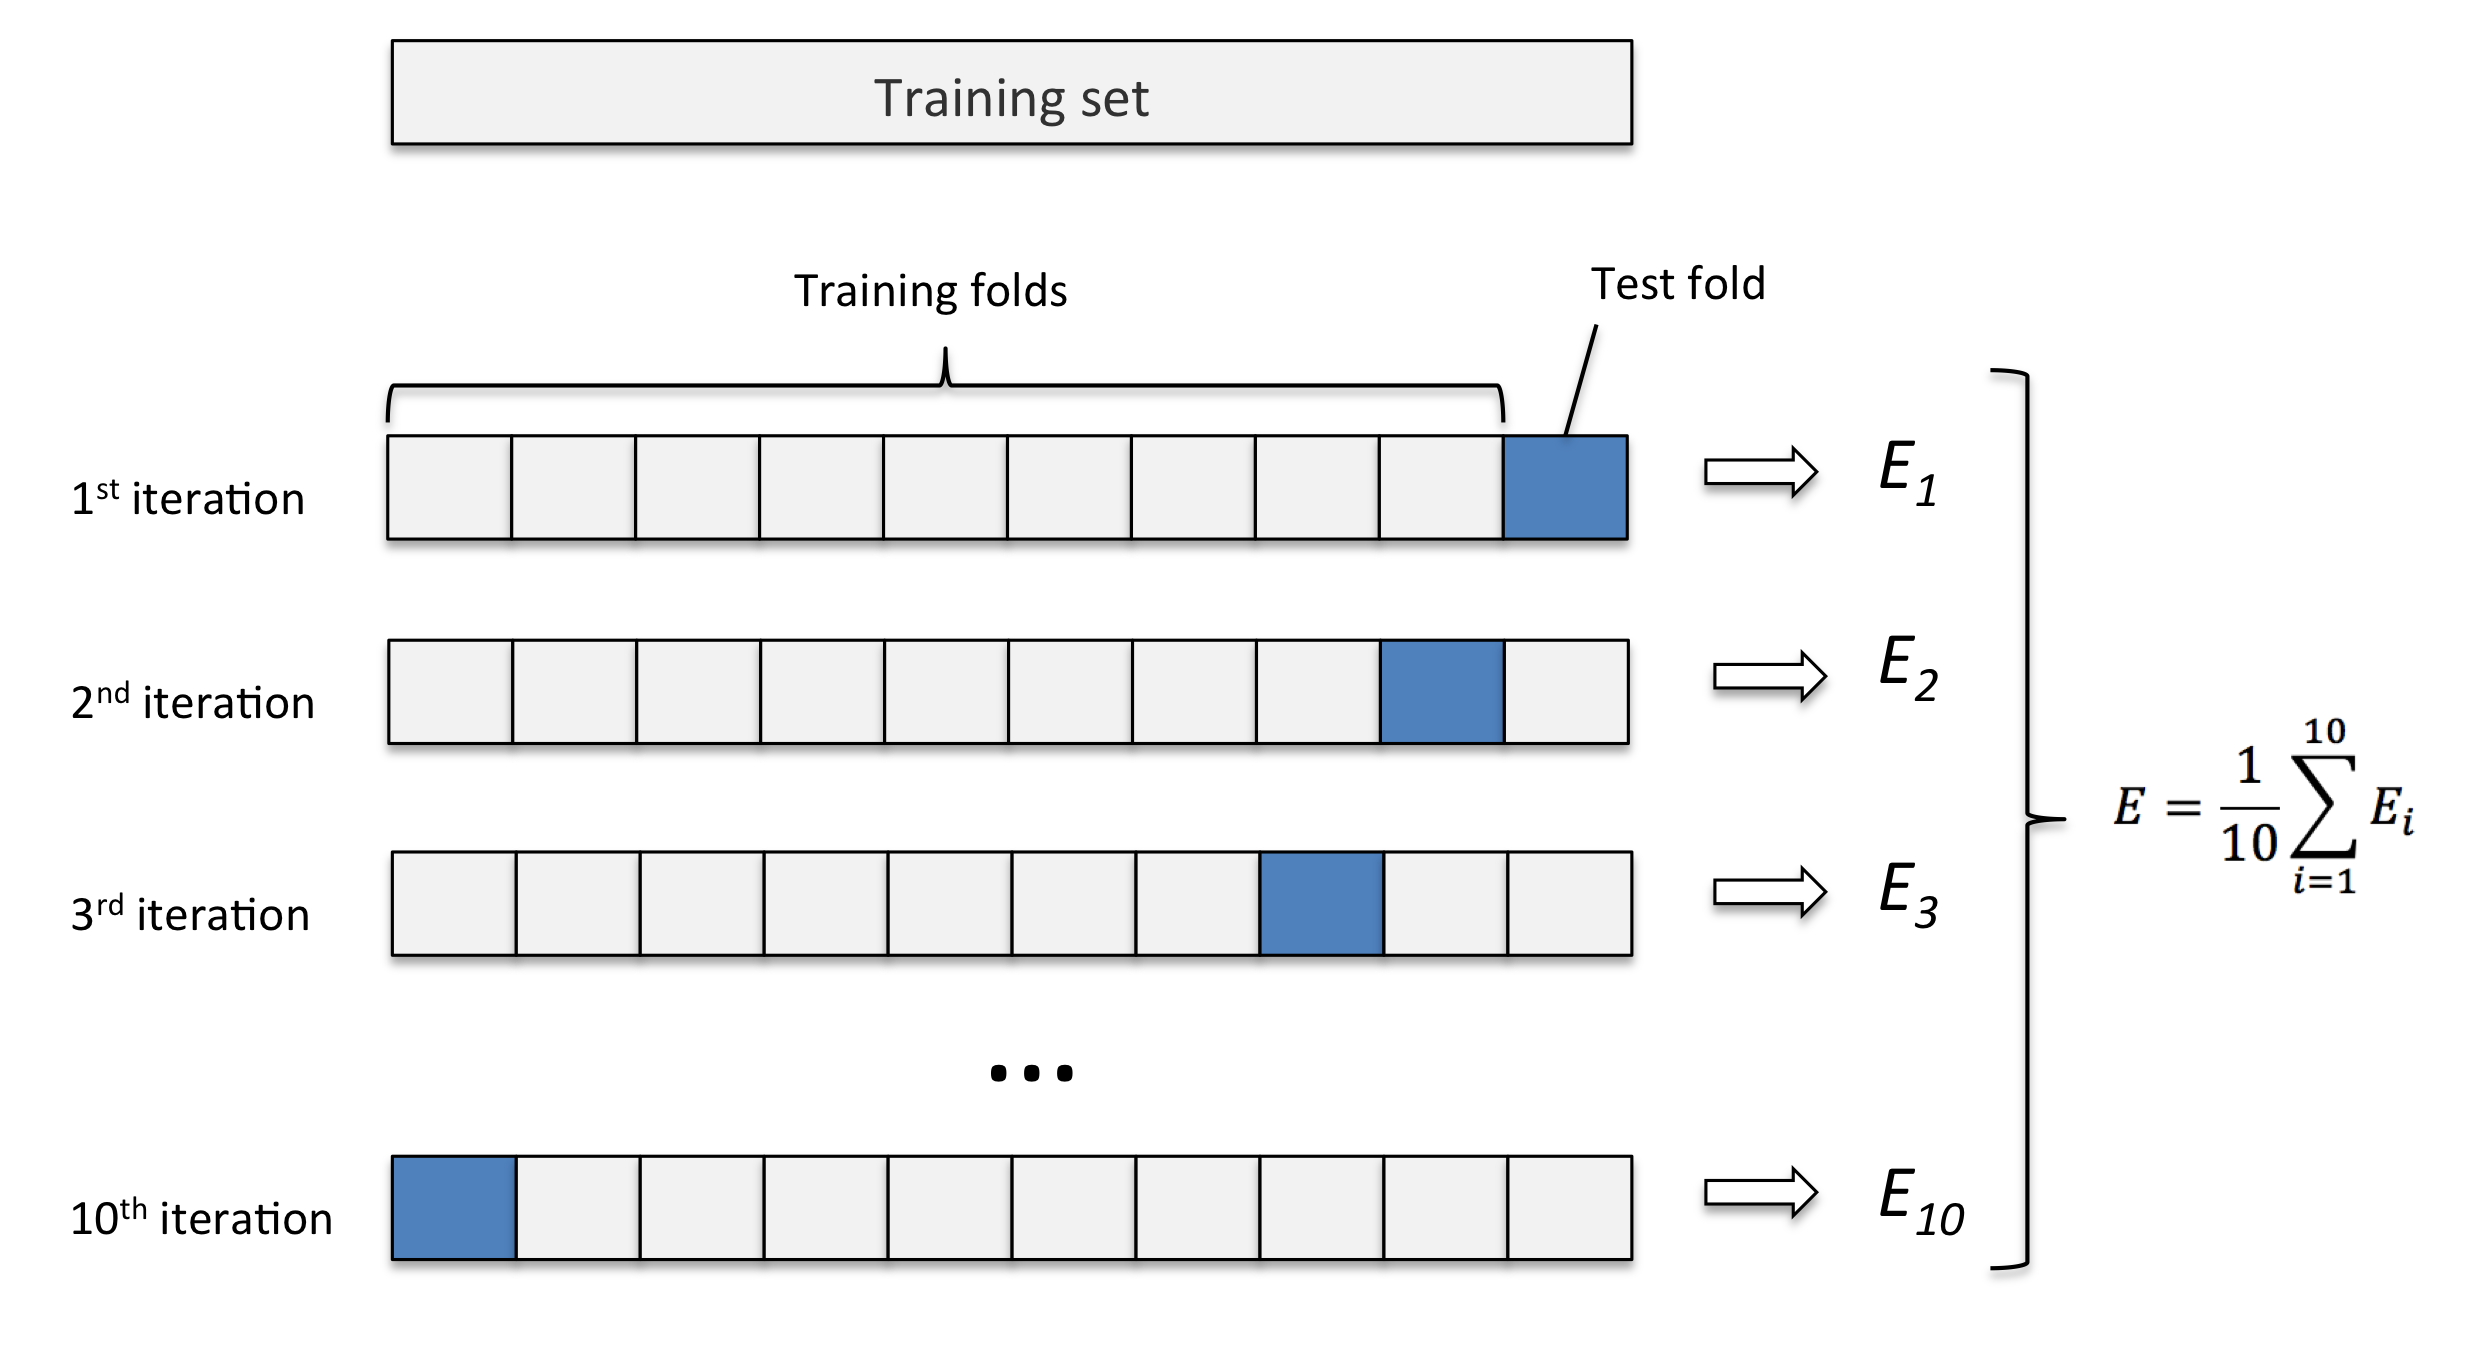
    3. Stratified K-Fold CV
        - Ensures that # of instances of each class for each experiment in train and test dataset is proper
    4. Time Series CV
        - splitting data based on date/time eg stock_price_prediction (check out Krish for project)

#### K-Fold CV

In [1]:
from sklearn.model_selection import cross_val_score

In [ ]:
final = gscv.best_estimator_ ## this final model obtained after RandomizedSearch and GridSearch hypertuning
cross = cross_val_score(final, X, y, cv=10) ## cv=10 means 10 experiments to be conducted
                                            ## score contians accuracies of those 10 diff experiments

In [ ]:
avg_acc = cross.mean()
min_acc = cross.min()

#### Stratified K-Fold CV

In [2]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=None)

In [ ]:
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y)
    X1_train = X.iloc[train_index]
    X1_test = X.iloc[test_index]
    y1_train = y.iloc[train_index]
    y1_test = y.iloc[test_index]
    
final.fit(X1_train,y1_train)
predictions = final.predict(X1_test)